In [21]:
import TensorFrost as tf
import numpy as np
import matplotlib.pyplot as plt
import time

def WaveIteration(u, v, dt):
    i,j = u.indices
    laplacian = u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - u * 4.0
    force = laplacian - 0.1 * tf.sin(2.0*np.pi*u)
    v_new = v + dt*force
    u_new = u + dt*v_new
    return u_new, v_new

def WaveEq():
    u = tf.input([-1, -1], tf.float32)
    v = tf.input([-1, -1], tf.float32)

    u,v = WaveIteration(u, v, 0.2)

    return [u, v]

tf.initialize(tf.cpu, "H:/cl_compile.bat /O2 /fp:fast /openmp")
test = tf.program(WaveEq)


dim =  2


In [22]:
#do a few steps and measure performance by timing every 100 steps
import time
import imageio
from IPython.display import Image
import os

start = time.time()

file_path = 'H:/TestVideos/wave.gif'

#remove file if it exists

if os.path.isfile(file_path):
    os.remove(file_path)

writer = imageio.get_writer(file_path, mode='I', fps=30, loop=0)

N = 256

x = np.arange(N)
y = np.arange(N)
X,Y = np.meshgrid(x, y)
Anp = np.exp(-((X-N/2)**2 + (Y-N/2+50)**2)/(10**2))
Anp += np.exp(-((X-N/2-50)**2 + (Y-N/2-50)**2)/(10**2))
Bnp = np.zeros((N, N))

A = tf.memory(Anp)
B = tf.memory(Bnp)

print("Used memory: " + str(tf.used_memory()))

iters = 1000

for i in range(iters):
    A, B = test(A, B)
    if(i % 50 == 0):
        frame = A.numpy
        frame = np.clip(np.abs(3.0 * frame * 255), 0, 255).astype(np.uint8)
        writer.append_data(frame)
    if i % 100 == 99:
        print("Iterations per second: " + str(100/(time.time()-start)))
        start = time.time()


writer.close()

print("Used memory: " + str(tf.used_memory()))

Used memory: 131072
Iterations per second: 5000.362422508345
Iterations per second: 6666.196220537517
Iterations per second: 6666.9379450661245
Iterations per second: 7143.009928643199
Iterations per second: 6666.408124990066
Iterations per second: 7143.374889297636
Iterations per second: 7143.131578051023
Iterations per second: 7143.253231602432
Iterations per second: 6666.196220537517
Iterations per second: 7143.253231602432
Used memory: 131076


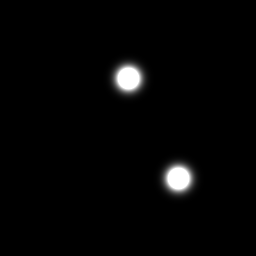

In [23]:
#display the gif
Image(filename=file_path)

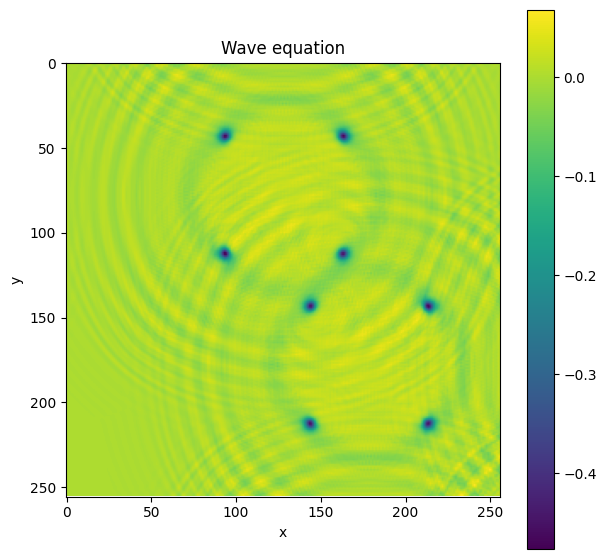

In [24]:
# Plot the results (with colorbar)
plt.figure(figsize=(7,7))
plt.imshow(A.numpy)
plt.colorbar()
plt.title("Wave equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()